In [57]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize, to_rgba
from matplotlib.cm import viridis

In [58]:
# Adjust the path
unicorns_csv_path= '/Users/eleni_icon/Unicorns/2 Data/Prepared data/Cleaned_Unicorns_Data.csv'
data =pd.read_csv(unicorns_csv_path)

In [59]:
# Display the first few rows of the dataset
print(data.head())

# Basic info about dataset
print(data.info())

# Descriptive statistics
print(data.describe())


     Company  Valuation ($B) Date Joined        Country            City  \
0  ByteDance           225.0  2017-04-07          China         Beijing   
1     SpaceX           150.0  2012-12-01  United States       Hawthorne   
2     OpenAI            80.0  2019-07-22  United States   San Francisco   
3      SHEIN            66.0  2018-07-03      Singapore  Singapore City   
4     Stripe            65.0  2014-01-23  United States   San Francisco   

                Industry  Year Joined  
0  Media & Entertainment         2017  
1            Industrials         2012  
2        Enterprise Tech         2019  
3      Consumer & Retail         2018  
4     Financial Services         2014  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1233 non-null   object 
 1   Valuation ($B)  1233 non-null   float64
 2   Date Joined     12

# Correlation Matrix Heatmap

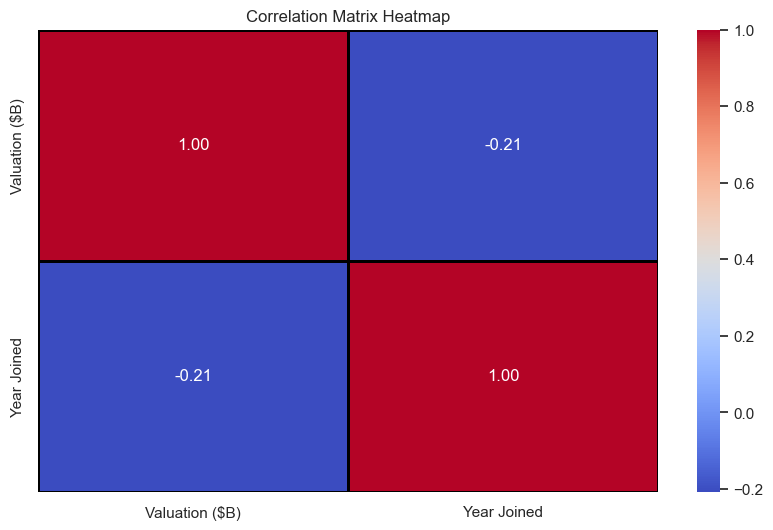

In [60]:
# Convert 'Year Joined' to a numeric type for correlation purposes
data['Year Joined'] = pd.to_numeric(data['Year Joined'])

# Calculating the correlation matrix
correlation_matrix =data[['Valuation ($B)', 'Year Joined']].corr()

# Creating a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()

The diagonal of the heatmap shows a correlation coefficient of 1.00 for both 'Valuation' and 'Year Joined' with themselves. This is expected as any variable is perfectly correlated with itself. The value of -0.21 between 'Valuation' and 'Year Joined' suggests a weak negative correlation between these two variables.

This indicates that there is a slight tendency for newer unicorns (those that joined more recently) to have lower valuations compared to those that joined earlier. However, the correlation is weak, implying that while there might be a trend, it is not strong or particularly significant. This could be influenced by a number of factors including market conditions at the time of reaching unicorn status, differences in industry sectors over years, or simply the increasing number of companies achieving unicorn status in more recent years, which might include a broader range of companies with varying levels of valuation.

# Scatterplot Of Valuation Vs. Year Joined

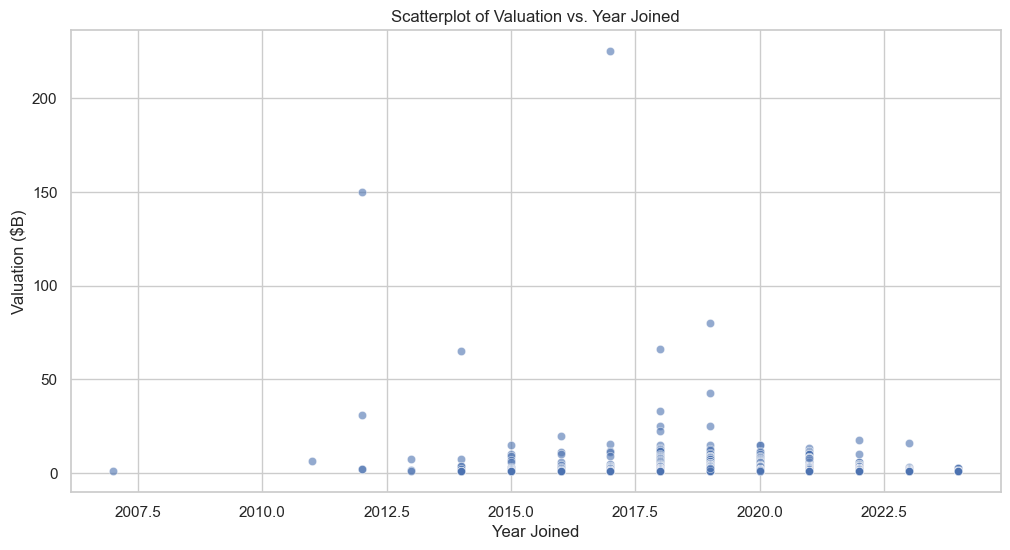

In [61]:
# Creating a scatterplot for 'Year Joined' and 'Valuation ($B)'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Year Joined', y='Valuation ($B)', alpha=0.6)
plt.title('Scatterplot of Valuation vs. Year Joined')
plt.xlabel('Year Joined')
plt.ylabel('Valuation ($B)')
plt.show()

The scatterplot illustrates the spread of company valuations over the years they achieved unicorn status. As shown, there is significant variability in valuation, but no clear trend indicating that more recent unicorns are necessarily valued higher or lower, consistent with the weak correlation observed.



# Time Series additional Analysis

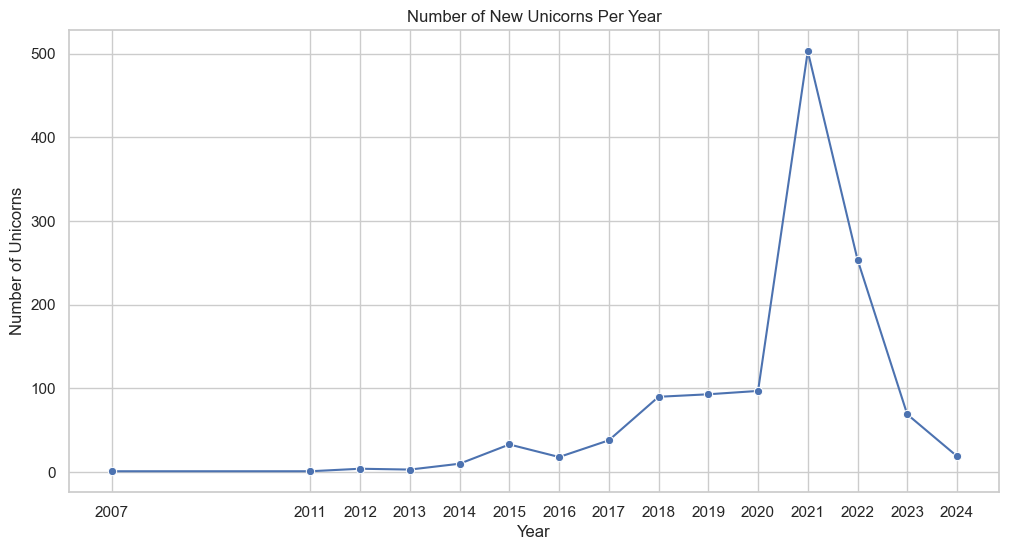

In [62]:
# Ensure 'Date Joined' is a datetime object and extract the year
data['Year Joined'] = pd.to_datetime(data['Date Joined']).dt.year

# Calculate the number of unicorns per year
unicorns_per_year = data['Year Joined'].value_counts().sort_index()

# Creating plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=unicorns_per_year.index, y=unicorns_per_year.values, marker='o')
plt.title('Number of New Unicorns Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(unicorns_per_year.index, [str(int(year)) for year in unicorns_per_year.index])  
plt.grid(True)
plt.show()

From 2007 to around 2018, the number of new unicorns per year shows gradual growth, indicating a steady increase in companies reaching a valuation of over $1 billion.

A dramatic surge in 2020 shows the highest concentration of new unicorns, where the number reaches approximately 400."

This peak is followed by an abrupt decrease in 2021, highlighting a volatile phase in the startup ecosystem.



# Pair plot of the relationships between the year companies joined the unicorn status and their valuations, colored by industry.

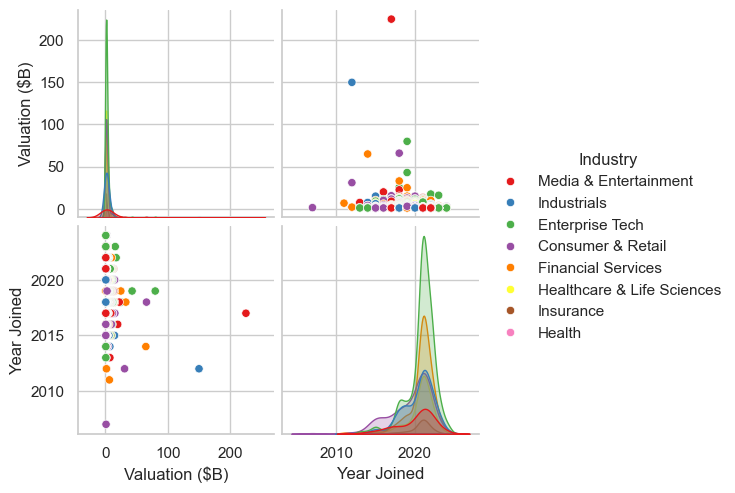

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that 'Year Joined' is treated as a numeric variable 
data['Year Joined'] = pd.to_numeric(data['Year Joined'])

# Creating the pair plot
sns.pairplot(data, hue='Industry', palette='Set1', vars=['Valuation ($B)', 'Year Joined'])
plt.show()


1. Distribution of Valuations and Years Joined (Diagonal)
Valuation Histogram/Density: The peak near the lower end of the valuation scale suggests that most unicorn companies have relatively low valuations in the context of the dataset, with a few exceptions reaching very high values.
Year Joined Density: The distribution shows a significant increase in companies achieving unicorn status in recent years, peaking around 2020. This indicates a growing trend in companies reaching unicorn status more frequently as time progresses.

2. Scatter Plots (Off-Diagonal)
Valuation vs. Year Joined: Each dot represents a unicorn company, with its position indicating its valuation and the year it achieved unicorn status. Colors indicate the industry. 
This scatter plot helps to visualize if there’s any noticeable trend or pattern between the time a company became a unicorn and its valuation.
Trend Analysis: There doesn't appear to be a strong trend between the year joined and the valuation. Companies across various years have a wide range of valuations.


# Catplot of Average Valuation by Country

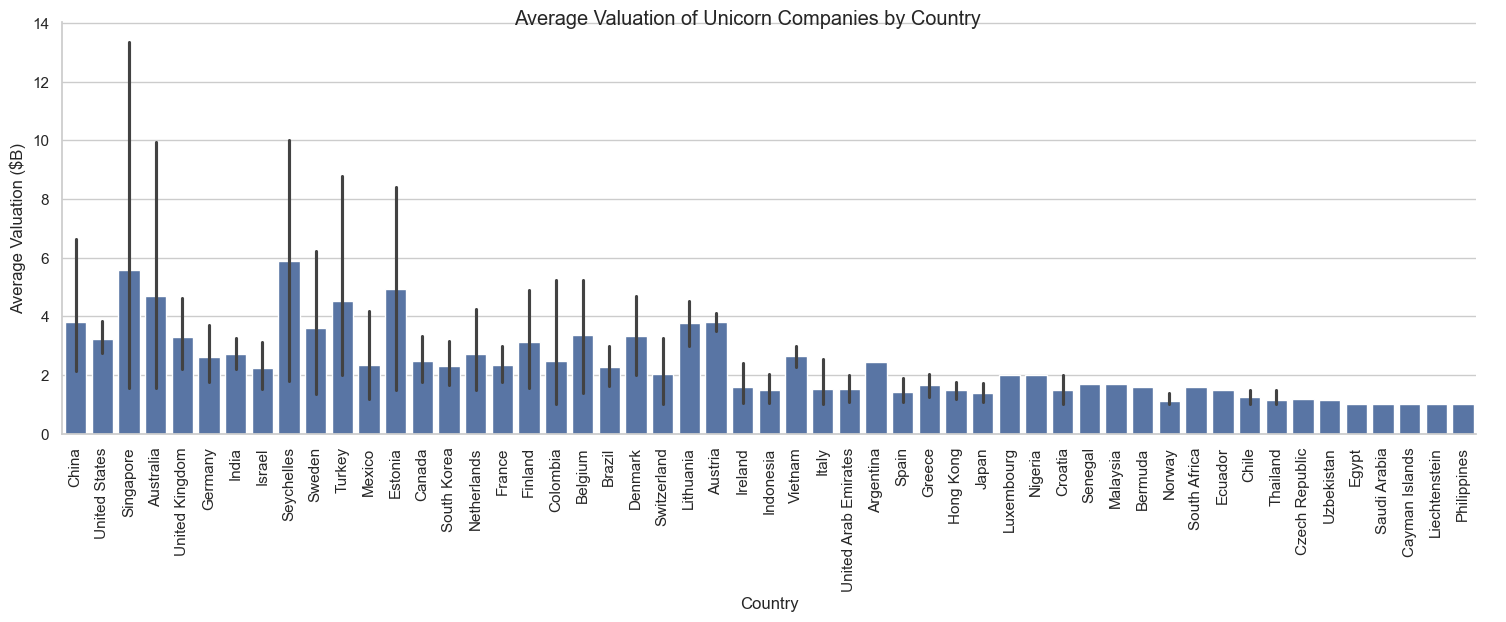

In [64]:
# Create a categorical plot (catplot) with a bar plot type
g = sns.catplot(
    data=data,            
    x='Country',         
    y='Valuation ($B)',   
    kind='bar',           
    height=5,             
    aspect=3              
)

# Enhance plot aesthetics
g.set_xticklabels(rotation=90)  # Rotate the x labels for better readability
g.set_axis_labels("Country", "Average Valuation ($B)")
g.fig.suptitle("Average Valuation of Unicorn Companies by Country")

# Show plot
plt.show()


Countries like China, the United States, and Singapore appear to have higher average valuations for their unicorn companies compared to others. This might suggest a more robust ecosystem for startups, possibly due to better access to venture capital, larger markets, or more favorable government policies.
This plot can indicate which regions might offer untapped opportunities. Regions with lower average valuations but stable economic conditions might be attractive for new investments.


# Answers to the questions asked

1. Average Valuation of Unicorn Companies by Industry: 
The highest average valuations are seen in the 'Media & Entertainment' industry, indicating this sector might have unique characteristics or opportunities that lead to higher company valuations.

2. Trend in the Number of Companies Achieving Unicorn Status Over the Years:
The data shows a significant increase in the number of unicorn companies over recent years, with a notable spike in 2021. This suggests an accelerating environment that supports startup growth and increased valuations.

3. Countries with the Highest Number of Unicorn Companies:
The United States, China, and India have the highest numbers of unicorn companies. This distribution suggests these countries offer favorable business environments, access to capital, and markets that support rapid growth and innovation.

4. Are Certain Industries More Likely to Produce Unicorn Companies Than Others?:
Yes, industries such as 'Media & Entertainment', 'Financial Services', and 'Industrials' are more likely to produce unicorn companies, suggesting these sectors have higher growth potentials or opportunities for disruptive innovation.

5. How Do Economic Conditions Such as Market Saturation or Investment Climate Correlate with the Emergence of Unicorns in Different Regions?:
The distribution of unicorns suggests that regions with robust investment ecosystems and less market saturation are more conducive to creating high-value companies.


# Additional questions : 

# Industry-Specific Factors: Average Valuation and Count by Industry

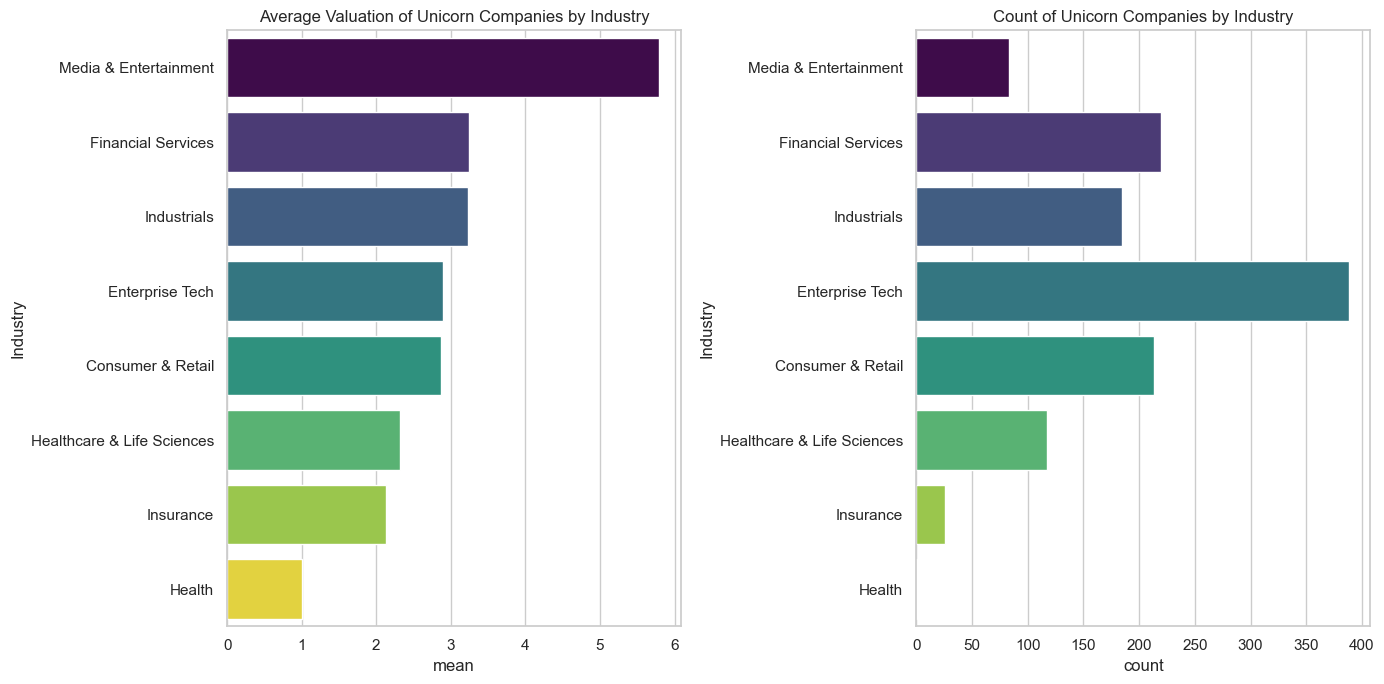

In [65]:
# Calculate average valuation and count by industry
industry_valuation = data.groupby('Industry')['Valuation ($B)'].agg(['mean', 'count']).reset_index()

# Sorting data for better visualization
industry_valuation_sorted = industry_valuation.sort_values(by='mean', ascending=False)

# Get the number of unique industries
num_industries = industry_valuation_sorted['Industry'].nunique()

# Create a color map and normalize function
norm = Normalize(vmin=0, vmax=num_industries-1)
colors = [to_rgba(viridis(norm(i))) for i in range(num_industries)]

# Creating the plots
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='mean', y='Industry', data=industry_valuation_sorted, palette=colors)
plt.title('Average Valuation of Unicorn Companies by Industry')

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='Industry', data=industry_valuation_sorted, palette=colors)
plt.title('Count of Unicorn Companies by Industry')
plt.tight_layout()
plt.show()


# Regional Analysis: Number of Unicorns by Region


['Argentina' 'Australia' 'Austria' 'Belgium' 'Bermuda' 'Brazil' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Croatia' 'Czech Republic'
 'Denmark' 'Ecuador' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malaysia' 'Mexico'
 'Netherlands' 'Nigeria' 'Norway' 'Philippines' 'Saudi Arabia' 'Senegal'
 'Seychelles' 'Singapore' 'South Africa' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uzbekistan' 'Vietnam']


Text(0.5, 1.0, 'Number of Unicorn Companies by Region')

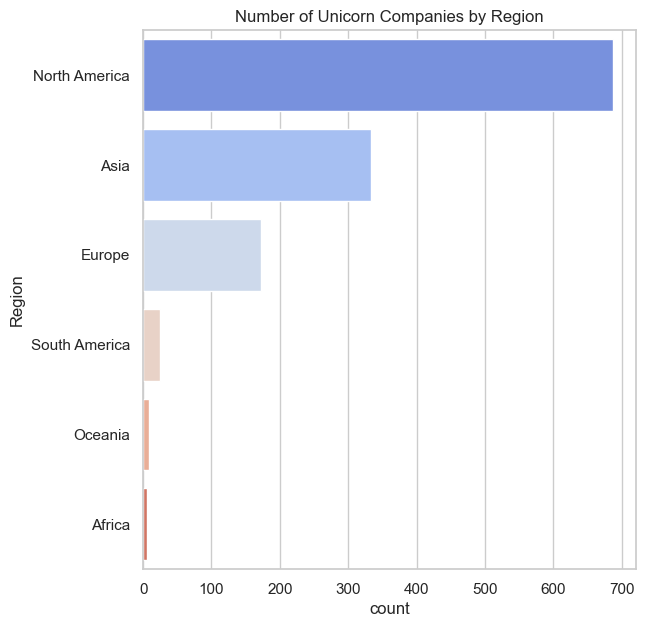

In [66]:

# Extract unique countries
unique_countries = data['Country'].unique()
unique_countries.sort()  # Sort the countries alphabetically for easier review
print(unique_countries)

country_to_region = {
    'Argentina': 'South America', 'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe',
    'Bermuda': 'North America', 'Brazil': 'South America', 'Canada': 'North America',
    'Cayman Islands': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Croatia': 'Europe', 'Czech Republic': 'Europe',
    'Denmark': 'Europe', 'Ecuador': 'South America', 'Egypt': 'Africa',
    'Estonia': 'Europe', 'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Greece': 'Europe', 'Hong Kong': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Japan': 'Asia',
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Malaysia': 'Asia', 'Mexico': 'North America', 'Netherlands': 'Europe',
    'Nigeria': 'Africa', 'Norway': 'Europe', 'Philippines': 'Asia',
    'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Seychelles': 'Africa',
    'Singapore': 'Asia', 'South Africa': 'Africa', 'South Korea': 'Asia',
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Thailand': 'Asia', 'Turkey': 'Asia', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uzbekistan': 'Asia',
    'Vietnam': 'Asia'
}


# Apply the region mapping to the 'Country' column
data['Region'] = data['Country'].map(country_to_region)

# Calculate count and average valuation by region
region_metrics = data.groupby('Region')['Valuation ($B)'].agg(['count']).reset_index()

# Sorting data for better visualization
region_metrics_sorted = region_metrics.sort_values(by='count', ascending=False)

# Creating the plots
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='count', y='Region', data=region_metrics_sorted, palette='coolwarm')
plt.title('Number of Unicorn Companies by Region')



Number of Unicorn Companies by Region
North America and Asia have the highest count of unicorn companies, which likely reflects the strong entrepreneurial ecosystems and access to venture capital in these regions.
Europe follows, showing a healthy but lesser number of unicorns compared to North America and Asia.
South America, Oceania, and Africa have significantly fewer unicorn companies.

# Top 10 Companies 

In [67]:
# Sort the DataFrame by the 'Valuation ($B)' column in descending order
top_companies = data.sort_values(by='Valuation ($B)', ascending=False)

# Select the top 10
top_ten_companies = top_companies.head(10)


In [68]:
# Display the top ten companies
print(top_ten_companies[['Company', 'Valuation ($B)', 'Country', 'Industry']])

       Company  Valuation ($B)         Country               Industry
0    ByteDance           225.0           China  Media & Entertainment
1       SpaceX           150.0   United States            Industrials
2       OpenAI            80.0   United States        Enterprise Tech
3        SHEIN            66.0       Singapore      Consumer & Retail
4       Stripe            65.0   United States     Financial Services
5   Databricks            43.0   United States        Enterprise Tech
7      Revolut            33.0  United Kingdom     Financial Services
9     Fanatics            31.0   United States      Consumer & Retail
6        Canva            25.4       Australia        Enterprise Tech
10       Chime            25.0   United States     Financial Services


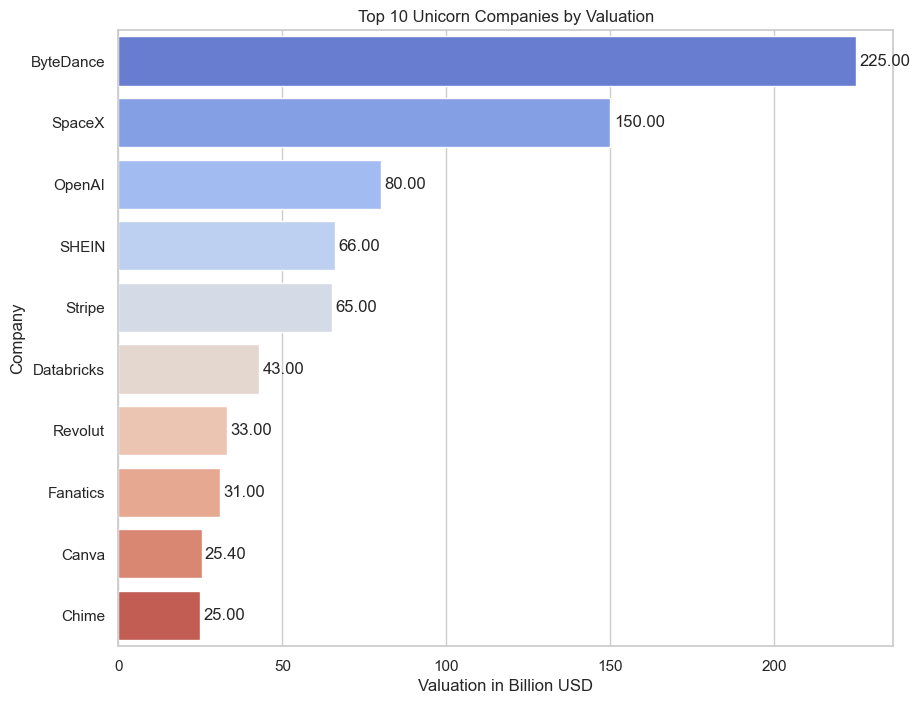

In [69]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot of the top ten companies
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Valuation ($B)',y='Company', data=top_ten_companies,palette='coolwarm')

# Adding title and labels
plt.title('Top 10 Unicorn Companies by Valuation')
plt.xlabel('Valuation in Billion USD')
plt.ylabel('Company')

# Add the valuation figures on the bars
for p in barplot.patches:
    width = p.get_width()    
    plt.text(width + 1,       
             p.get_y() + p.get_height() / 2,  
             '{:1.2f}'.format(width), 
             ha = 'left',  
             va = 'center')  

plt.show()


# Hypothesis

Unicorn companies that joined the unicorn status post-2015 have witnessed a faster rate of increase in valuation compared to those that joined before 2015